In [14]:
file_path = './height-weight.csv'

# import DataFrame from pandas package so that we can work with this tabular data
import pandas as pd
from pandas import DataFrame as df

data_frame = pd.read_csv(file_path, sep=',')

# now that we have a DataFrame lets peek into the data and see how it looks
data_frame.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [15]:
data_frame['height(cm)'] = data_frame['Height(Inches)'].map(lambda inches: round(inches * 2.54, 2))
data_frame.head()

,Index,Height(Inches),Weight(Pounds),height(cm)
0,1,65.78331,112.9925,167.09
1,2,71.51521,136.4873,181.65
2,3,69.39874,153.0269,176.27
3,4,68.21660,142.3354,173.27
4,5,67.78781,144.2971,172.18


In [16]:
data_frame['weight(kg)'] = data_frame['Weight(Pounds)'].map(lambda pounds: round(pounds * 0.453592, 2))
data_frame.head()

,Index,Height(Inches),Weight(Pounds),height(cm),weight(kg)
0,1,65.78331,112.9925,167.09,51.25
1,2,71.51521,136.4873,181.65,61.91
2,3,69.39874,153.0269,176.27,69.41
3,4,68.21660,142.3354,173.27,64.56
4,5,67.78781,144.2971,172.18,65.45


In [17]:
df = data_frame[['height(cm)', 'weight(kg)']]
df.head()

,height(cm),weight(kg)
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [24]:
len(df.index)

25000

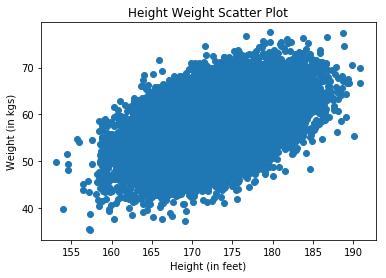

In [25]:
# introducing the matplotlib package which lets us plot charts, graphs in Python
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df['height(cm)'], df['weight(kg)'])
plt.title('Height Weight Scatter Plot')
plt.xlabel('Height (in feet)')
plt.ylabel('Weight (in kgs)')
plt.show()

In [40]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df['height(cm)'], df['weight(kg)'])
print("Coefficient: ",slope)
print("Offset: ",intercept)

Coefficient:  0.5506334725390714
Offset:  -37.453556443088274


In [41]:
import matplotlib.pyplot as plt

plt?

Type:        module
String form: <module 'matplotlib.pyplot' from 'D:\\Formations\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>
File:        d:\formations\anaconda\lib\site-packages\matplotlib\pyplot.py
Docstring:  
`matplotlib.pyplot` is a state-based interface to matplotlib. It provides
a MATLAB-like way of plotting.

pyplot is mainly intended for interactive plots and simple cases of programmatic
plot generation::

    import numpy as np
    import matplotlib.pyplot as plt

    x = np.arange(0, 5, 0.1)
    y = np.sin(x)
    plt.plot(x, y)

The object-oriented API is recommended for more complex plots.


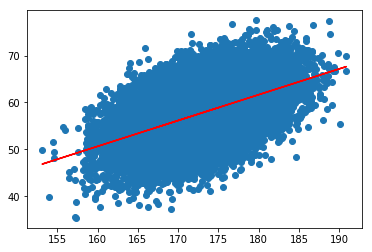

In [47]:
def predict(x):
    return slope * x + intercept

fitLine = predict(df['height(cm)'])

plt.scatter(df['height(cm)'], df['weight(kg)'])
plt.plot(df['height(cm)'], fitLine, c='r')
plt.show()

In [48]:
r_value ** 2

0.2528587128668972

In [51]:
predict(170)*(r_value**2)

14.199062017215143

r_value ** 2 doit être le plus proche de 1.
r_value ** 2 = 1 signifie une précision de 100%
r_value ** * = 0.25 signifie 25% de précision
notre modèle est plutôt nul.
Nous ne prenons pas en compte par exemple: age, ethnie, pays, genre etc...
